In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
# %matplotlib notebook

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH
%aimport models.AEFIT5
%aimport models.Compose
%aimport models.GAN3

import livelossplot.keras
class PlotLossesCallback(livelossplot.keras.PlotLossesCallback):
    def on_train_batch_begin(self, a, b): pass
    def on_train_batch_end(self, a, b): pass
    def on_test_begin(self, a): pass
    def on_test_end(self, a): pass
    def on_test_batch_begin(self, a, b): pass
    def on_test_batch_end(self, a, b): pass

    
class PlotRelevanceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(13, 3)
        w = self.model.layers[0].weights
        ax1.bar(range(0,4), w[0][0:4])
        labels = ['Ip','NS','Vt','F']
        plt.sca(ax1)
        plt.xticks(range(0,4), labels, fontsize=10)
        ax2.bar(range(7,17), w[0][4:14])
        plt.sca(ax2)
        plt.xticks(range(7,17), fontsize=10)        
        ax3.bar(range(7,17), w[0][14:24])
        plt.sca(ax3)
        plt.xticks(range(7,17), fontsize=10)       


# ipysh.Bootstrap_support.debug()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


Using TensorFlow backend.


# TEST QSH


In [2]:
qsh = Dataset_QSH.Dataset_QSH()
import os
#file = ipysh.abs_builddir+'/te_db_r15_clean_shuffle.npy'
file = ipysh.abs_builddir+'/te_db_r15u_shuffle.npy'
try: qsh.load(file)
except: raise FileNotFoundError

    

    
    
# qsh.shuffle()
qsh.dim = None
qsh.set_null(np.nan)
qsh.set_normal_positive(['prel','te','tbordo','tcentro', 'Ip','NS','VT','F','absBr_rm','argBr_rm','absBt_rm','argBt_rm']) 
print("QSH rebalanced 15 points size: ", len(qsh))




QSH rebalanced 15 points size:  47567


In [3]:
def _map(xy,p,Br):
    pBr = tf.concat([p,Br], axis=0)
    return pBr,xy

ds = qsh.tf_tuple_compose(['prel~te:15','Ip~NS~VT~F','absBr_rm~argBr_rm~absBt_rm~argBt_rm']).map(lambda x,y,br: _map(x,y,br) )
[x for x in ds.shuffle(100).batch(1).take(1)][0]

W1010 09:51:56.244976 140652257126208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:505: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


(<tf.Tensor: id=56, shape=(1, 44), dtype=float32, numpy=
 array([[0.4411698 , 0.51654625, 0.4331578 , 0.6806927 , 0.23191875,
         0.02838282, 0.05818924, 0.07286257, 0.02418357, 0.01522049,
         0.04734558, 0.02685008, 0.00669944, 0.02114688, 0.7601802 ,
         0.27338824, 0.33410746, 0.8639807 , 0.2810478 , 0.8633253 ,
         0.17642349, 0.39984587, 0.67181   , 0.526719  , 0.5235148 ,
         0.01815586, 0.05823321, 0.05762606, 0.04851581, 0.03032592,
         0.03551764, 0.05470292, 0.01770315, 0.02557263, 0.08607309,
         0.14924134, 0.6470489 , 0.12113418, 0.5549469 , 0.9876431 ,
         0.4556186 , 0.71733654, 0.87010735, 0.96627957]], dtype=float32)>,
 <tf.Tensor: id=57, shape=(1, 30), dtype=float32, numpy=
 array([[0.02827343, 0.10277789, 0.15121816, 0.20828514, 0.27427357,
         0.3485927 , 0.42948723, 0.51404023, 0.59859335, 0.6794879 ,
         0.75380695, 0.8197954 , 0.8768625 ,        nan, 0.96593666,
         0.20523198, 0.22951429, 0.2573426 , 0.2514

In [4]:
vae = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=30, dprate=0.1, beta=0., scale=2, geometry=[20,20,10,10])
vae.compile( vae.optimizer, tf.losses.mse )

AEFIT5 a ready:


In [ ]:
dds = ds.map(lambda p,xy: (xy,xy))
vae_history = vae.fit( dds.skip(5000).batch(100, drop_remainder=True), validation_data=dds.take(5000).batch(100), epochs=50, shuffle=False)

In [5]:
##### vae.save('step12_vae_ls_tesi') 
vae.load('step12_vae_ls_tesi')

# vae.inference_net.get_config()
# tf.saved_model.save(vae.inference_net, '/tmp/thesis/vae/12_7/inference_net')
# cacca = tf.saved_model.load('/tmp/thesis/vae/12_7/inference_net')


In [6]:
vae1 = models.AEFIT5.AEFIT5(latent_dim=3, feature_dim=44, dprate=0.1, scale=2, geometry=[20,20,10,10])
vae1.generative_net.trainable = False
gen = vae1.inference_net

AEFIT5 a ready:


In [7]:
Dds = ds.map(lambda p,xy: (p, tf.reshape(vae.encode(tf.reshape(xy,[1,-1]),training=False)[0],[-1])) )
[x for x in Dds.batch(1).take(1)][0]

(<tf.Tensor: id=1332, shape=(1, 44), dtype=float32, numpy=
 array([[0.25542352, 0.89690715, 0.5000725 , 0.72894037, 0.6297897 ,
         0.01312985, 0.0324371 , 0.05359358, 0.01716399, 0.00990941,
         0.0400793 , 0.0399195 , 0.06290268, 0.04126021, 0.6044492 ,
         0.1787289 , 0.688863  , 0.4169602 , 0.569177  , 0.55776334,
         0.51906776, 0.51577735, 0.5848686 , 0.5530569 , 0.35387266,
         0.07624952, 0.0583109 , 0.07664161, 0.06004565, 0.05006363,
         0.03981413, 0.04301573, 0.0187492 , 0.02158177, 0.78949267,
         0.4092855 , 0.7506054 , 0.7082309 , 0.8146324 , 0.8425355 ,
         0.873515  , 0.9027877 , 0.92006683, 0.9131522 ]], dtype=float32)>,
 <tf.Tensor: id=1333, shape=(1, 6), dtype=float32, numpy=
 array([[-1.7226157 ,  0.08701155, -0.5887357 ,  0.67033434,  0.40336818,
         -0.20947173]], dtype=float32)>)

In [8]:
# TRAIN MODEL
rel = gen.layers[0]
rel.rate = 0.
gen.compile( tf.optimizers.Adam(1e-3), tf.losses.mse )

In [ ]:
fit = lambda: gen.fit( Dds.skip(3000).batch(100), validation_data=Dds.take(3000).batch(100), epochs=400,
                      callbacks=[PlotLossesCallback()], shuffle=False )
models.base.fn_thread(gen, fit).control_panel()

In [ ]:
# TODO:
# save this image as:  STEP12_7_pBr2SXR_rm-rs_absarg_training_mse.png

In [9]:
# vae1.save('step12_7_thesis_BrBt')
vae1.load('step12_7_thesis_BrBt')

In [ ]:
gen.layers[1].weights

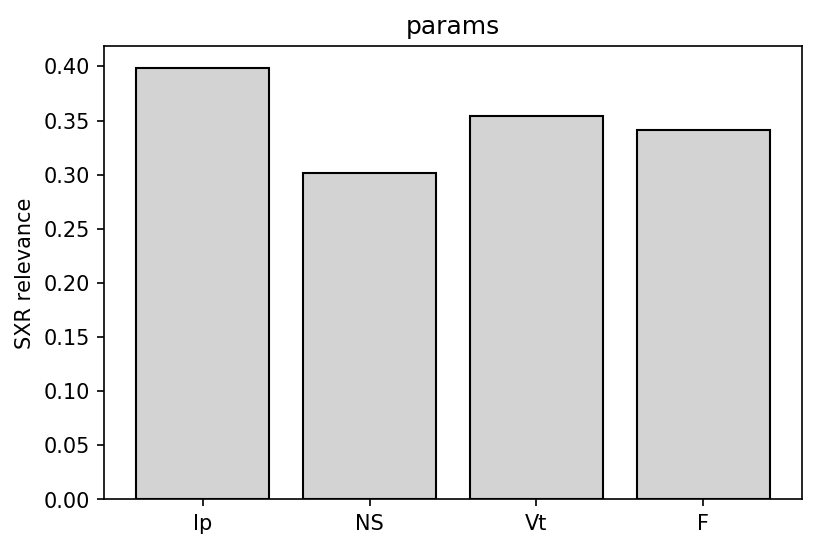

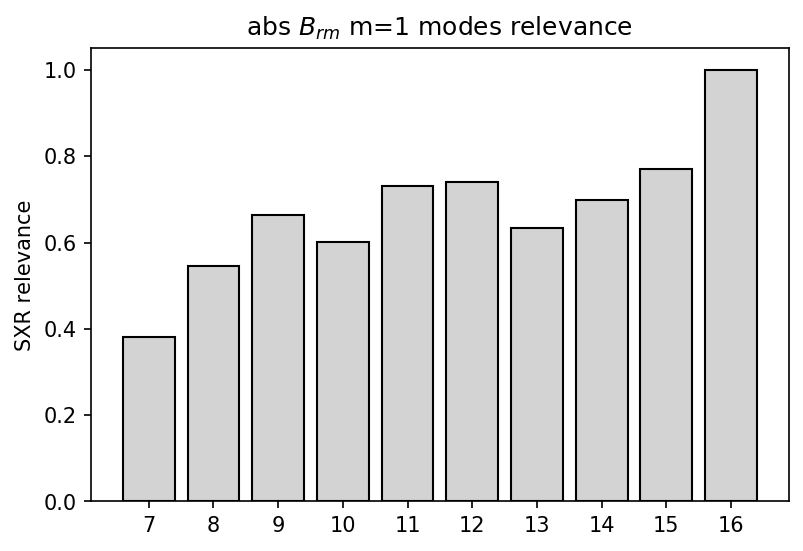

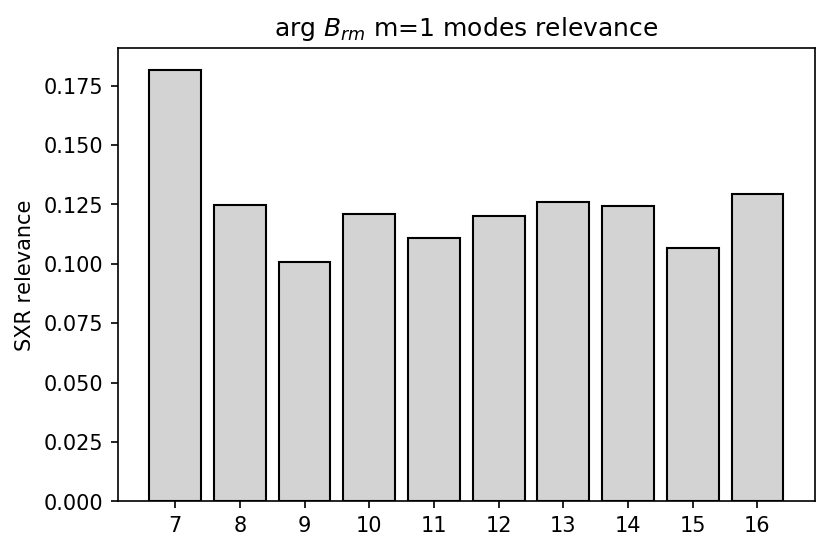

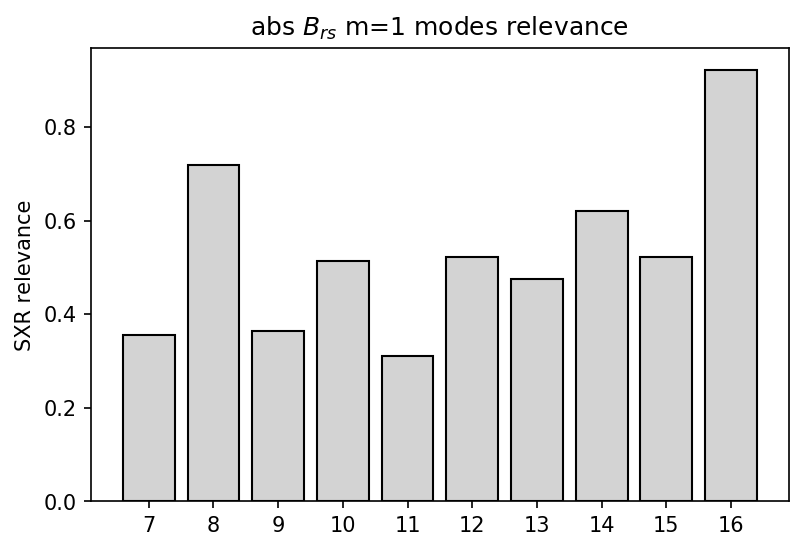

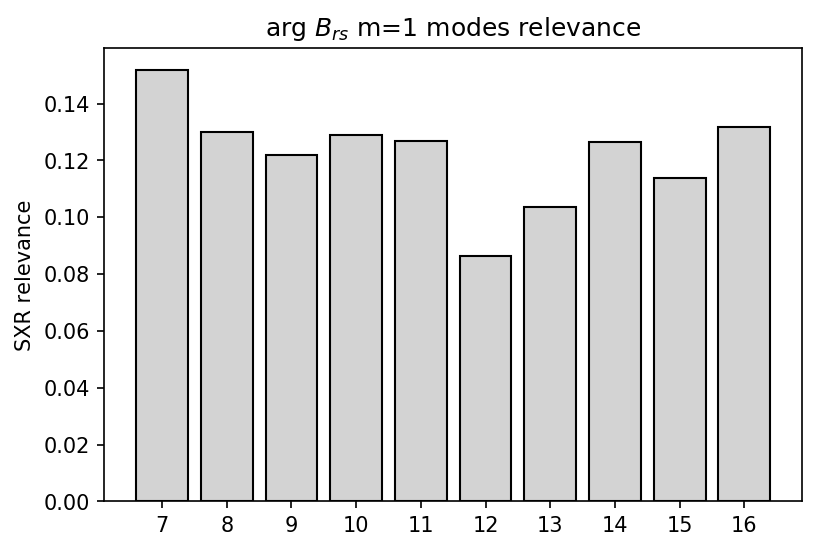

In [528]:
index = qsh[0].n
w = gen.layers[1].weights
%matplotlib inline

def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    plt.ylabel('SXR relevance', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    plt.show()

p,abs_Brm,arg_Brm,abs_Brs,arg_Brs = w[0][0:4],w[0][4:14], w[0][14:24], w[0][24:34], w[0][34:44]
plot_bar_x(['Ip','NS','Vt','F'], p, 'params')
plot_bar_x(index, abs_Brm, 'abs $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, arg_Brm, 'arg $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, abs_Brs, 'abs $B_{rs}$ m=1 modes relevance')
plot_bar_x(index, arg_Brs, 'arg $B_{rs}$ m=1 modes relevance')


In [518]:
pos = 0

42


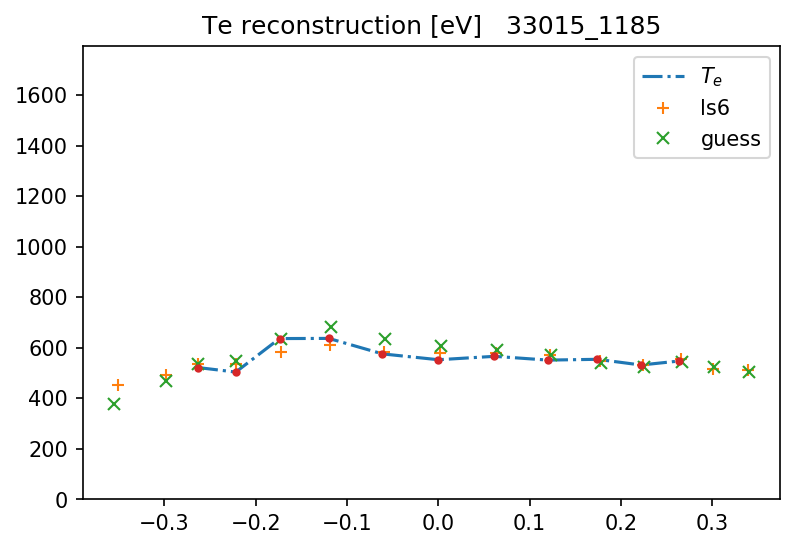

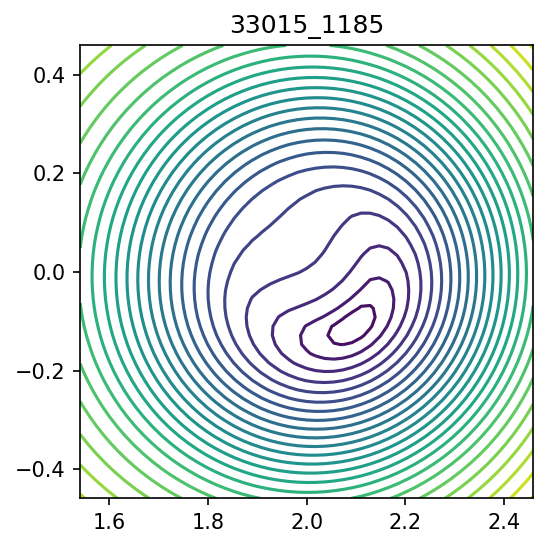

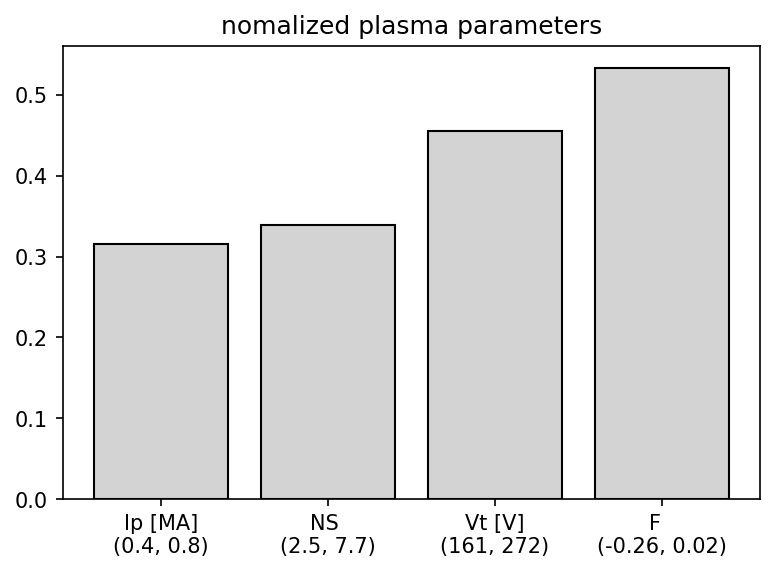

In [525]:
print(pos)


def un(x, min=0., max=2242.511):
    return min + x*(max-min)

def unx(x, min=-0.373, max=0.353):
    return min + x*(max-min)

def plot_tf(xy, name=None, h='.'):
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,un(0.8))
    xy = tf.reshape(xy, [-1])
    x,y = tf.split(xy, num_or_size_splits=2, axis=0)
    plt.plot(unx(x),un(y),h, label=name)
    ax.legend()

def plot(x,y, name=None, h='.'):  
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,un(0.8))
    plt.plot(unx(x),un(y), h, label=name)
    #ax.legend()
    
def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    plt.clf()
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    # plt.ylabel('plasma parameters', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    return fig
    
def plot_te(pos):    
    d_pos = [x for x in ds.skip(pos).batch(1).take(1)][0]
    path = '/home/andrea/Documents/phd/Thesis/img/STEP12/STEP12_7'
    p  = d_pos[0]
    xy = d_pos[1]

    fig = plt.figure('plot')
    plt.clf()
    # plt.text(0.05,0.7, '$I_p = %.2f$'%qsh[pos]['Ip'] )
    ax = plt.gca()
    ax.set_title( 'Te reconstruction [eV]   '+qsh[pos].label.decode("utf-8") )

    XY_vae = vae(xy, training=False)
    ls = gen(d_pos[0], training=False)
    XY = vae.decode(ls, training=False)
    # XY = tf.sigmoid(XY)
    plot_tf(xy, '$T_e$','-.')
    plot_tf(XY_vae, 'ls6','+')
    plot_tf(XY, 'guess','x')
    plot(qsh[pos]['prel'],qsh[pos]['te'], '$T_c$')

    fig2 = plt.figure('contour')
    plt.clf()
    ax2  = plt.gca()
    fig2.set_dpi(150)
    qsh[pos].plot_countour(ax=ax2)
    #ax2.set_title('SHeq')
    fig2.savefig( path+'/Contour_'+str(pos)+'.png')

    fig3 = plot_bar_x(['Ip [MA]\n(0.4, 0.8)',
                       'NS \n(2.5, 7.7)',
                       'Vt [V]\n(161, 272)',
                       'F  \n(-0.26, 0.02)'], qsh[pos]['Ip~NS~VT~F'], 'nomalized plasma parameters')
    fig3.savefig( path+'/Params_'+str(pos)+'.png')

    fig = plt.figure('plot')
    fig.savefig( path+'/Te_rec_'+str(pos)+'.png')

for pos in range(250):
    plot_te(pos)


In [530]:
q = [q for q in ds.batch(2).take(1)][0]
q

(<tf.Tensor: id=14320209, shape=(2, 44), dtype=float32, numpy=
 array([[2.55423516e-01, 8.96907151e-01, 5.00072479e-01, 7.28940368e-01,
         6.29789710e-01, 1.31298527e-02, 3.24371047e-02, 5.35935760e-02,
         1.71639938e-02, 9.90940724e-03, 4.00792994e-02, 3.99194993e-02,
         6.29026815e-02, 4.12602052e-02, 6.04449213e-01, 1.78728893e-01,
         6.88862979e-01, 4.16960210e-01, 5.69176972e-01, 5.57763338e-01,
         5.19067764e-01, 5.15777349e-01, 5.84868610e-01, 5.53056896e-01,
         3.53872657e-01, 7.62495175e-02, 5.83108962e-02, 7.66416118e-02,
         6.00456521e-02, 5.00636324e-02, 3.98141257e-02, 4.30157334e-02,
         1.87491979e-02, 2.15817690e-02, 7.89492667e-01, 4.09285486e-01,
         7.50605404e-01, 7.08230913e-01, 8.14632416e-01, 8.42535496e-01,
         8.73515010e-01, 9.02787685e-01, 9.20066833e-01, 9.13152218e-01],
        [2.54412800e-01, 5.05412042e-01, 4.43442494e-01, 5.46140492e-01,
         2.77281046e-01, 1.51793985e-02, 6.09120028e-03, 3.5

In [526]:
loss = {
    'mse' : [],
    'sum_e' : [],
#    'sum_ve': [],
    'max' : [],
    'min' : [],
    'Ip' : [],
    'NS' : [],
    'Vt' : [],
    'F'  : [],
}
fig = plt.figure()

def un(x, min, max):
    return min + x*(max-min)

for i,d_pos in enumerate(ds.batch(300).take(10)):
    p  = d_pos[0]
    xy = d_pos[1]
    XY_vae = vae(xy, training=False)
    ls = gen(d_pos[0], training=False)
    XY = vae.decode(ls, training=False)
    
    prel = tf.split(p, split_)
    
    mse = tf.losses.mse(XY_vae,XY)
    sum_e = tf.reduce_sum( (XY_vae-XY), axis=1) / 15
    max_e = tf.reduce_max( XY_vae-XY, axis=1) 
    min_e = tf.reduce_min( XY_vae-XY, axis=1) 
    # plot_tf(XY_vae, 'ls6','+')
    # plot_tf(XY, 'guess','x')
    for i in range(300):
        loss['mse'].append( un(mse[i].numpy(),0.,2242.511) )
        loss['sum_e'].append( un(sum_e[i].numpy(),0.,2242.511)  )
        loss['max'].append( un(max_e[i].numpy()-min_e[i].numpy(),0.,2242.511)  )
        loss['min'].append( un(min_e[i].numpy()-max_e[i].numpy(),0.,2242.511)  )
        loss['Ip'].append( un(p[i][0].numpy(),0.41,0.79) )
        loss['NS'].append( un(p[i][1].numpy(),2.55,7.69) )
        loss['Vt'].append( un(p[i][2].numpy(),161.15, 272.39) ) 
        loss['F'].append(p[i][3].numpy())
    

<Figure size 432x288 with 0 Axes>

norm (-1.6999547649682687, 63.06764475978434)
kurt 5.2553468226173585
logistic (-2.8782433152322384, 31.646530861879068)


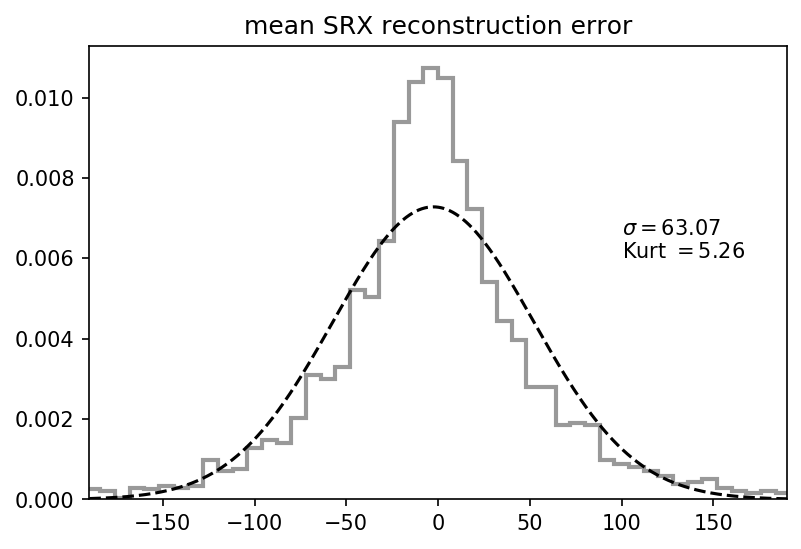

In [527]:
import seaborn as sns
from scipy import stats

#x = np.clip( np.array(loss['sum_e']), a_min=-200., a_max=200. )
lim = 200.
lim_f = 200.
x = np.array(loss['sum_e'])
X_in  = x[ (x > -lim_f) & (x < lim_f) ]
X_out = x[ (x < -lim_f) | (x > lim_f) ]

ax = sns.distplot( x, kde=False ,norm_hist=True, hist_kws={"range": [-lim,lim], "histtype": "step", "linewidth": 2, "color": "k"} );

xx = np.arange(-lim,lim, 0.1)
mu,std = stats.norm.fit(X_in)
yy = stats.norm.pdf(xx,mu,std)
ax.plot(xx,yy,'--k', label='norm')

# mu,std = stats.logistic.fit(x)
# yy = stats.logistic.pdf(xx,mu,std)
# ax.plot(xx,yy,'-.r', label='N_2')


fig = plt.gcf()
fig.set_dpi(150)
plt.xlim(-190,190)
#plt.legend()

ax.set_title('mean SRX reconstruction error')

plt.text(100,0.006,'$\sigma = %.2f$\nKurt $= %.2f$'%(x.std(),stats.kurtosis(x)))

print('norm',stats.norm.fit(x))
print('kurt',stats.kurtosis(x))
print('logistic',stats.logistic.fit(x))

norm (92.01660717767889, 83.2834526117693)
logistic (80.30564024037673, 39.62413570269672)


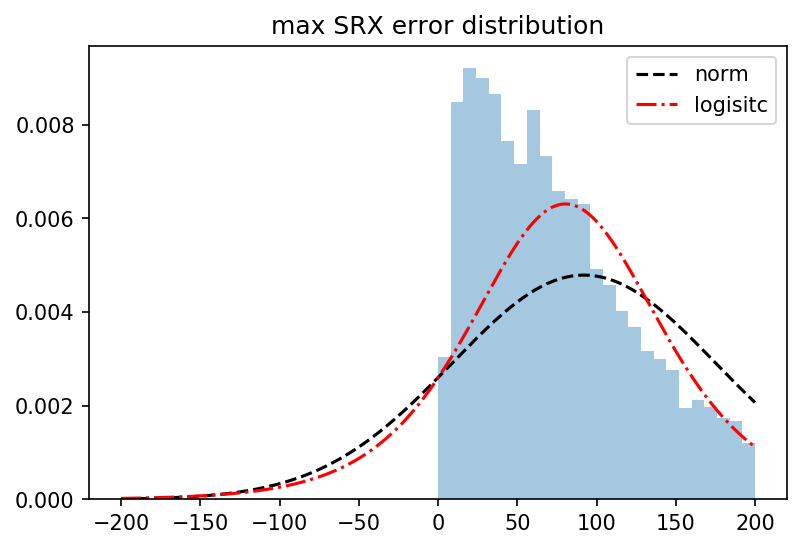

In [182]:
import seaborn as sns
from scipy import stats

#x = np.clip( np.array(loss['sum_e']), a_min=-200., a_max=200. )
lim = 200.
x = loss['max']
# x = x[ x < lim ]
# x = x[ x > -lim ]

ax = sns.distplot( x, kde=False, norm_hist=True, hist_kws={"range": [-lim,lim]} );

xx = np.arange(-lim,lim, 0.1)
mu,std = stats.norm.fit(x)
yy = stats.norm.pdf(xx,mu,std)
ax.plot(xx,yy,'--k', label='norm')

mu,std = stats.logistic.fit(x)
yy = stats.logistic.pdf(xx,mu,std)
ax.plot(xx,yy,'-.r', label='logisitc')


fig = plt.gcf()
fig.set_dpi(150)
# plt.xlim(-190,190)
plt.legend()

ax.set_title('max SRX error distribution')
print('norm',stats.norm.fit(x))
print('logistic',stats.logistic.fit(x))

40000


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.41  , 0.4176, 0.4252, 0.4328, 0.4404, 0.448 , 0.4556, 0.4632,
        0.4708, 0.4784, 0.486 , 0.4936, 0.5012, 0.5088, 0.5164, 0.524 ,
        0.5316, 0.5392, 0.5468, 0.5544, 0.562 , 0.5696, 0.5772, 0.5848,
        0.5924, 0.6   , 0.6076, 0.6152, 0.6228, 0.6304, 0.638 , 0.6456,
        0.6532, 0.6608, 0.6684, 0.676 , 0.6836, 0.6912, 0.6988, 0.7064,
        0.714 , 0.7216, 0.7292, 0.7368, 0.7444, 0.752 , 0.7596, 0.7672,
        0.7748, 0.7824, 0.79  ]),
 array([-0.66441734, -0.5138823 , -0.36334726, -0.21281222, -0.06227718,
         0.08825786,  0.2387929 ,  0.38932794,  0.53986298,  0.69039802,
         0.84093306,  0.9914681 ,  1.14200314,  1.29253818,  1.44307322,
         1.59360826,  1.7441433 ,  1.89467834,  2.04521338,  2.195

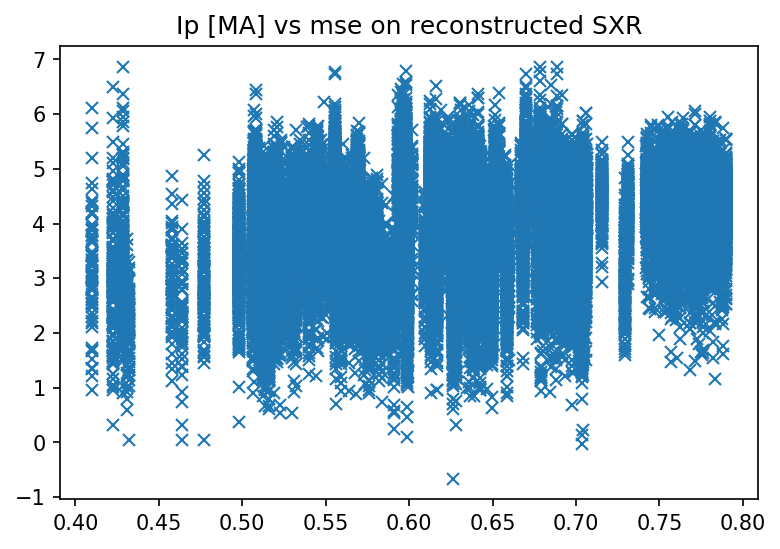

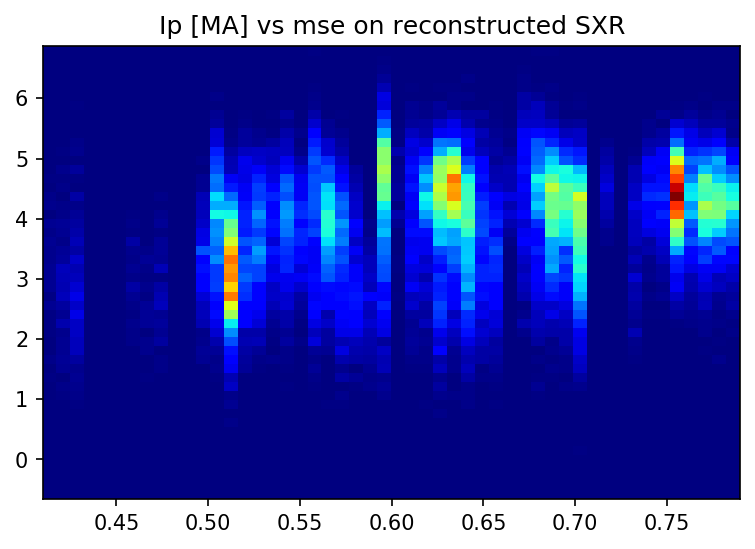

In [499]:
print(len(loss['mse']))
fig = plt.figure('params vs mse')
fig.set_dpi(150)
ax = plt.gca()
ax.set_title('Ip [MA] vs mse on reconstructed SXR')
# plt.yscale('log')
# plt.plot(loss['Ip'],loss['mse'],'+')
plt.plot(loss['Ip'],np.log(loss['max']),'x')
# plt.plot(loss['NS'],loss['mse'],'x')
# plt.plot(loss['Vt'],loss['mse'],'.')
# plt.plot(loss['F'],loss['mse'],'.')

fig = plt.figure('Ip hist')
fig.set_dpi(150)
ax = plt.gca()
ax.set_title('Ip [MA] vs mse on reconstructed SXR')
plt.hist2d(loss['Ip'], np.log(loss['max']), (50, 50), cmap=plt.cm.jet)
# plt.hist2d(loss['Ip'], loss['sum_e'], (50, 50), cmap=plt.cm.jet)
# plt.colorbar()

40000


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.55  , 2.6528, 2.7556, 2.8584, 2.9612, 3.064 , 3.1668, 3.2696,
        3.3724, 3.4752, 3.578 , 3.6808, 3.7836, 3.8864, 3.9892, 4.092 ,
        4.1948, 4.2976, 4.4004, 4.5032, 4.606 , 4.7088, 4.8116, 4.9144,
        5.0172, 5.12  , 5.2228, 5.3256, 5.4284, 5.5312, 5.634 , 5.7368,
        5.8396, 5.9424, 6.0452, 6.148 , 6.2508, 6.3536, 6.4564, 6.5592,
        6.662 , 6.7648, 6.8676, 6.9704, 7.0732, 7.176 , 7.2788, 7.3816,
        7.4844, 7.5872, 7.69  ]),
 array([-10.31961933, -10.02848032,  -9.73734132,  -9.44620231,
         -9.15506331,  -8.8639243 ,  -8.5727853 ,  -8.28164629,
         -7.99050729,  -7.69936828,  -7.40822928,  -7.11709028,
         -6.82595127,  -6.53481227,  -6.24367326,  -5.95253426,
         -5.66139525,  -5.370

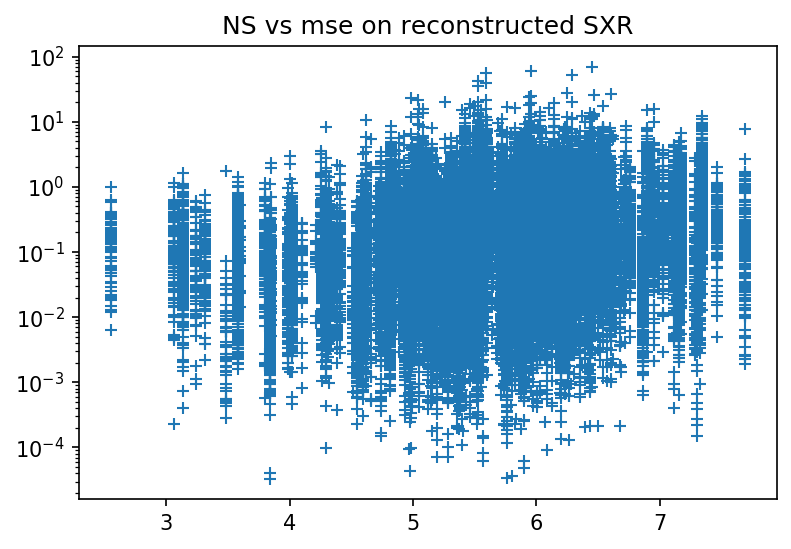

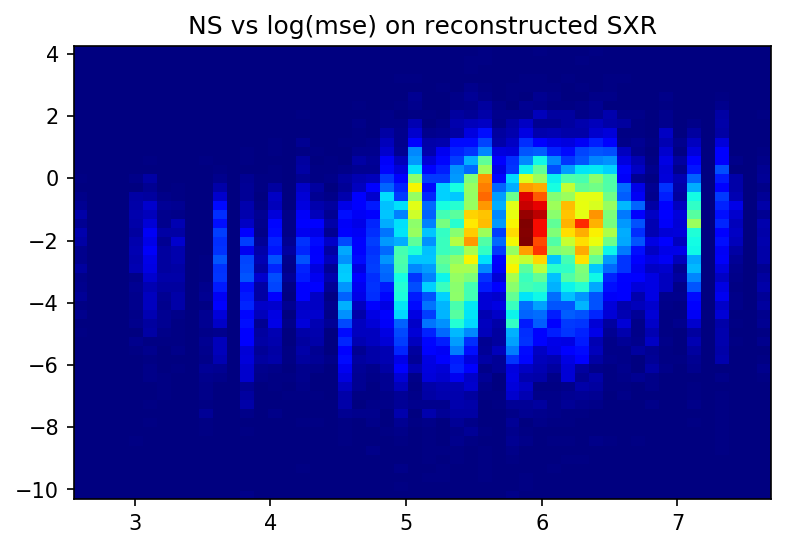

In [509]:
print(len(loss['mse']))
fig = plt.figure('params vs mse')
fig.set_dpi(150)
ax = plt.gca()
ax.set_title('NS vs mse on reconstructed SXR')
plt.yscale('log')
plt.plot(loss['NS'],loss['mse'],'+')


fig = plt.figure('NS hist')
ax = plt.gca()
ax.set_title('NS vs log(mse) on reconstructed SXR')
fig.set_dpi(150)
plt.hist2d(loss['NS'], np.log(loss['mse']), (50, 50), cmap=plt.cm.jet)
# plt.colorbar()
